# Clustering Assignment

#### Importing all required libraries:

In [2]:
# Supress the  Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

# For data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale the data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Reading and understanding the data:

In [4]:
#reading the file

df = pd.read_csv("C:/Users/Arindam/Downloads/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.shape

(167, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## EDA

#### Data cleaning:

Changing percentages to absolute values

In [8]:
# Converting exports,imports and health spending percentages to absolute values.

df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [9]:
# Checking for null values in the column
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### checking for unique value

In [10]:
#Looking for spelling mistakes
print(df['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

There is no spelling mistake.

#### Checking for outliers:

In [11]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1c5fb2b1948>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5fb2b1ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5fb29fb48>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5fb2bad88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5fb2ac6c8>],
 'means': []}

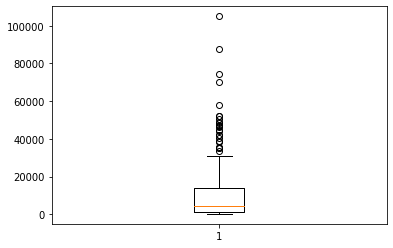

In [12]:
plt.boxplot(df.gdpp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5fb35ae88>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5fb35de48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5fb35a3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5fb362f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5fb362ec8>],
 'means': []}

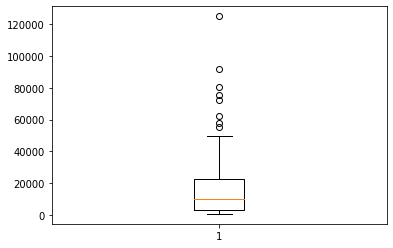

In [13]:
plt.boxplot(df.income)

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001C5FB3CCE48>, <matplotlib.lines.Line2D object at 0x000001C5FB3CCFC8>], 'caps': [<matplotlib.lines.Line2D object at 0x000001C5FB37EE08>, <matplotlib.lines.Line2D object at 0x000001C5FB37EF88>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001C5FB3CC3C8>], 'medians': [<matplotlib.lines.Line2D object at 0x000001C5FB3D4D88>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001C5FB3D4F48>], 'means': []}


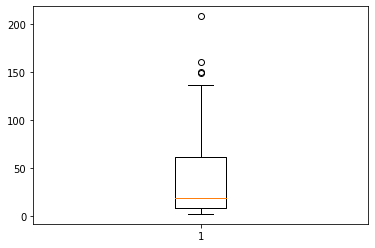

In [14]:
print(plt.boxplot(df.child_mort))

We see that `gdpp`, `income` and `child_mort` column has high outliers. However let's not remove outliers 
from`inflation` as this might lead to loss in country details which are not doing well- socio-economically(countries with direst need of aid).

Hence we will plot further plots to check for outliers for each column .

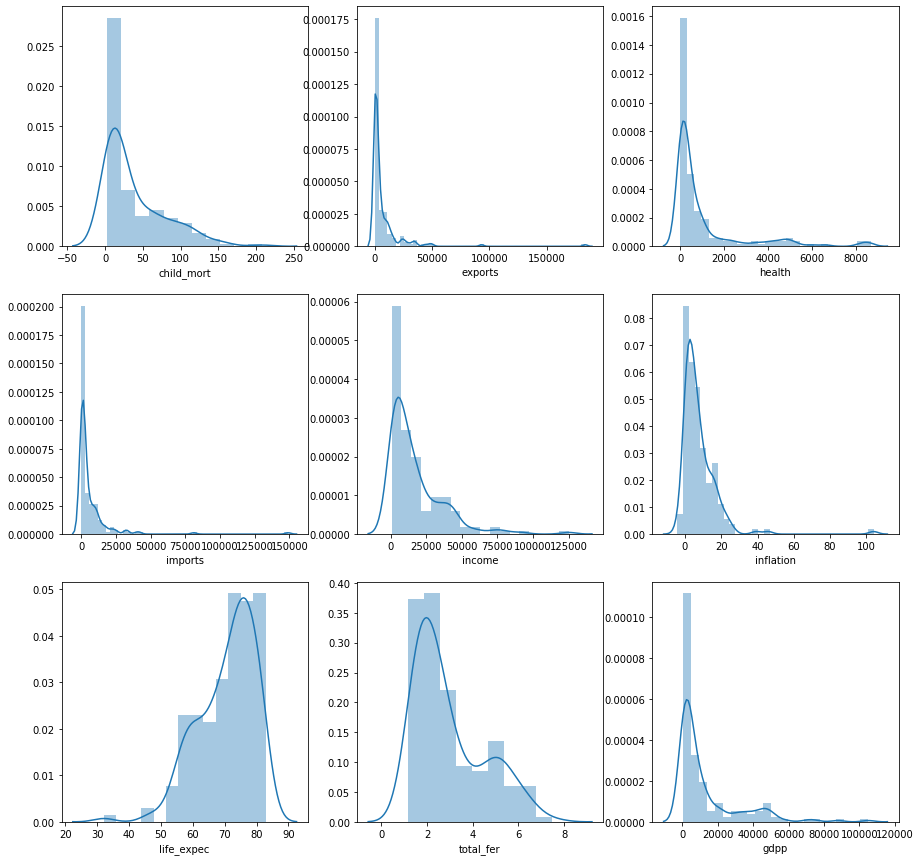

In [15]:
plt.figure(figsize = (15,15))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]])

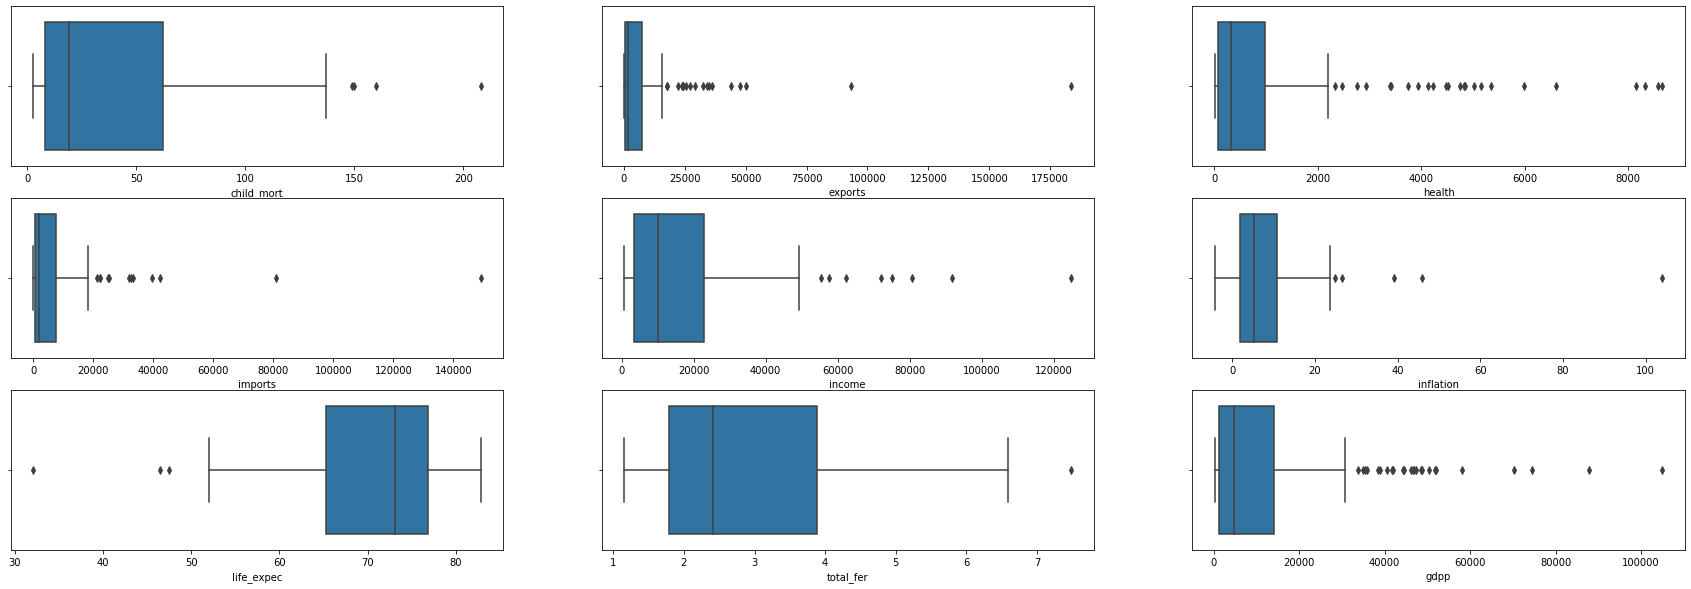

In [16]:
plt.figure(figsize = (30,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

We see there are outliers in all the cases

Outlier Treatement

- For all the columns,we will not cap or drop the outliers at the lower range but we will treat the upper range outliers and this is because, we may end up loosing some countries are are actually in the need of AID.
- For child_mort, we will not  cap or drop the outliers at the upper range but we will treat the lower range outliers.


- 1-99: Soft range
- 5-95: mid range
- 25-75: hard range

In [17]:
# We will take soft range for all the outliers except for child_mort
# For child_mort we will do for 0.01

q1 = df["child_mort"].quantile(0.01)

df["child_mort"][df["child_mort"]<= q1] = q1

q2 = df["imports"].quantile(0.99)

df["imports"][df["imports"]>= q2] = q2

q3 = df["exports"].quantile(0.99)

df["exports"][df["exports"]>= q3] = q3

q4 = df["health"].quantile(0.99)

df["health"][df["health"]>= q4] = q4

q5 = df["income"].quantile(0.99)

df["income"][df["income"]>= q5] = q5

q6 = df["inflation"].quantile(0.99)

df["inflation"][df["inflation"]>= q6] = q6

q7 = df["life_expec"].quantile(0.99)

df["life_expec"][df["life_expec"]>= q7] = q7

q8 = df["total_fer"].quantile(0.99)

df["total_fer"][df["total_fer"]>= q8] = q8

q9 = df["gdpp"].quantile(0.99)

df["gdpp"][df["gdpp"]>= q9] = q9



In [18]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.551138,2.942259,12756.826347
std,40.327869,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.886987,1.498340,17430.208938
min,2.800000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,55136.308400,8352.982736,46629.102600,81883.160000,39.974520,82.257800,6.554624,76125.920000


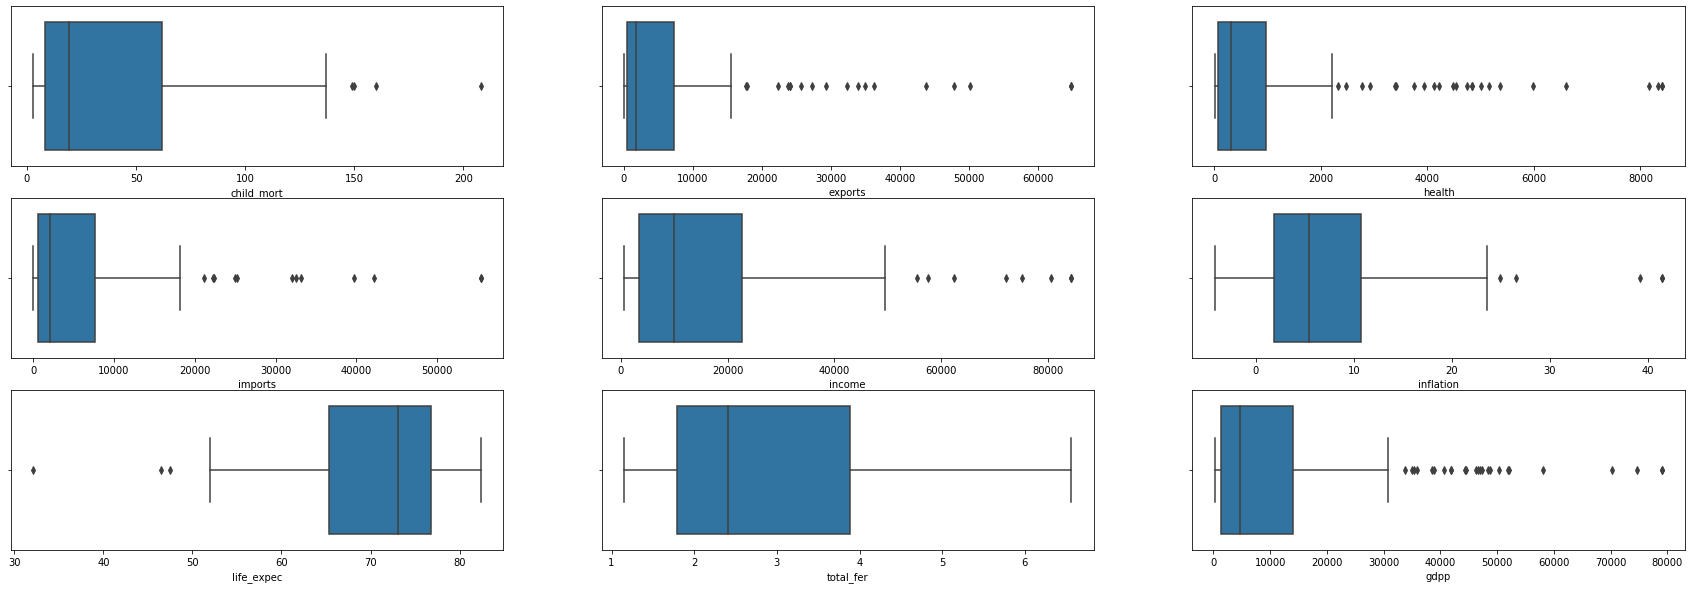

In [19]:
plt.figure(figsize = (30,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

We see that most of the outliers are handled .

In [20]:
df.shape

(167, 10)

#### Visualising the Data:

Using pairplot and hearmaps

<Figure size 288x288 with 0 Axes>

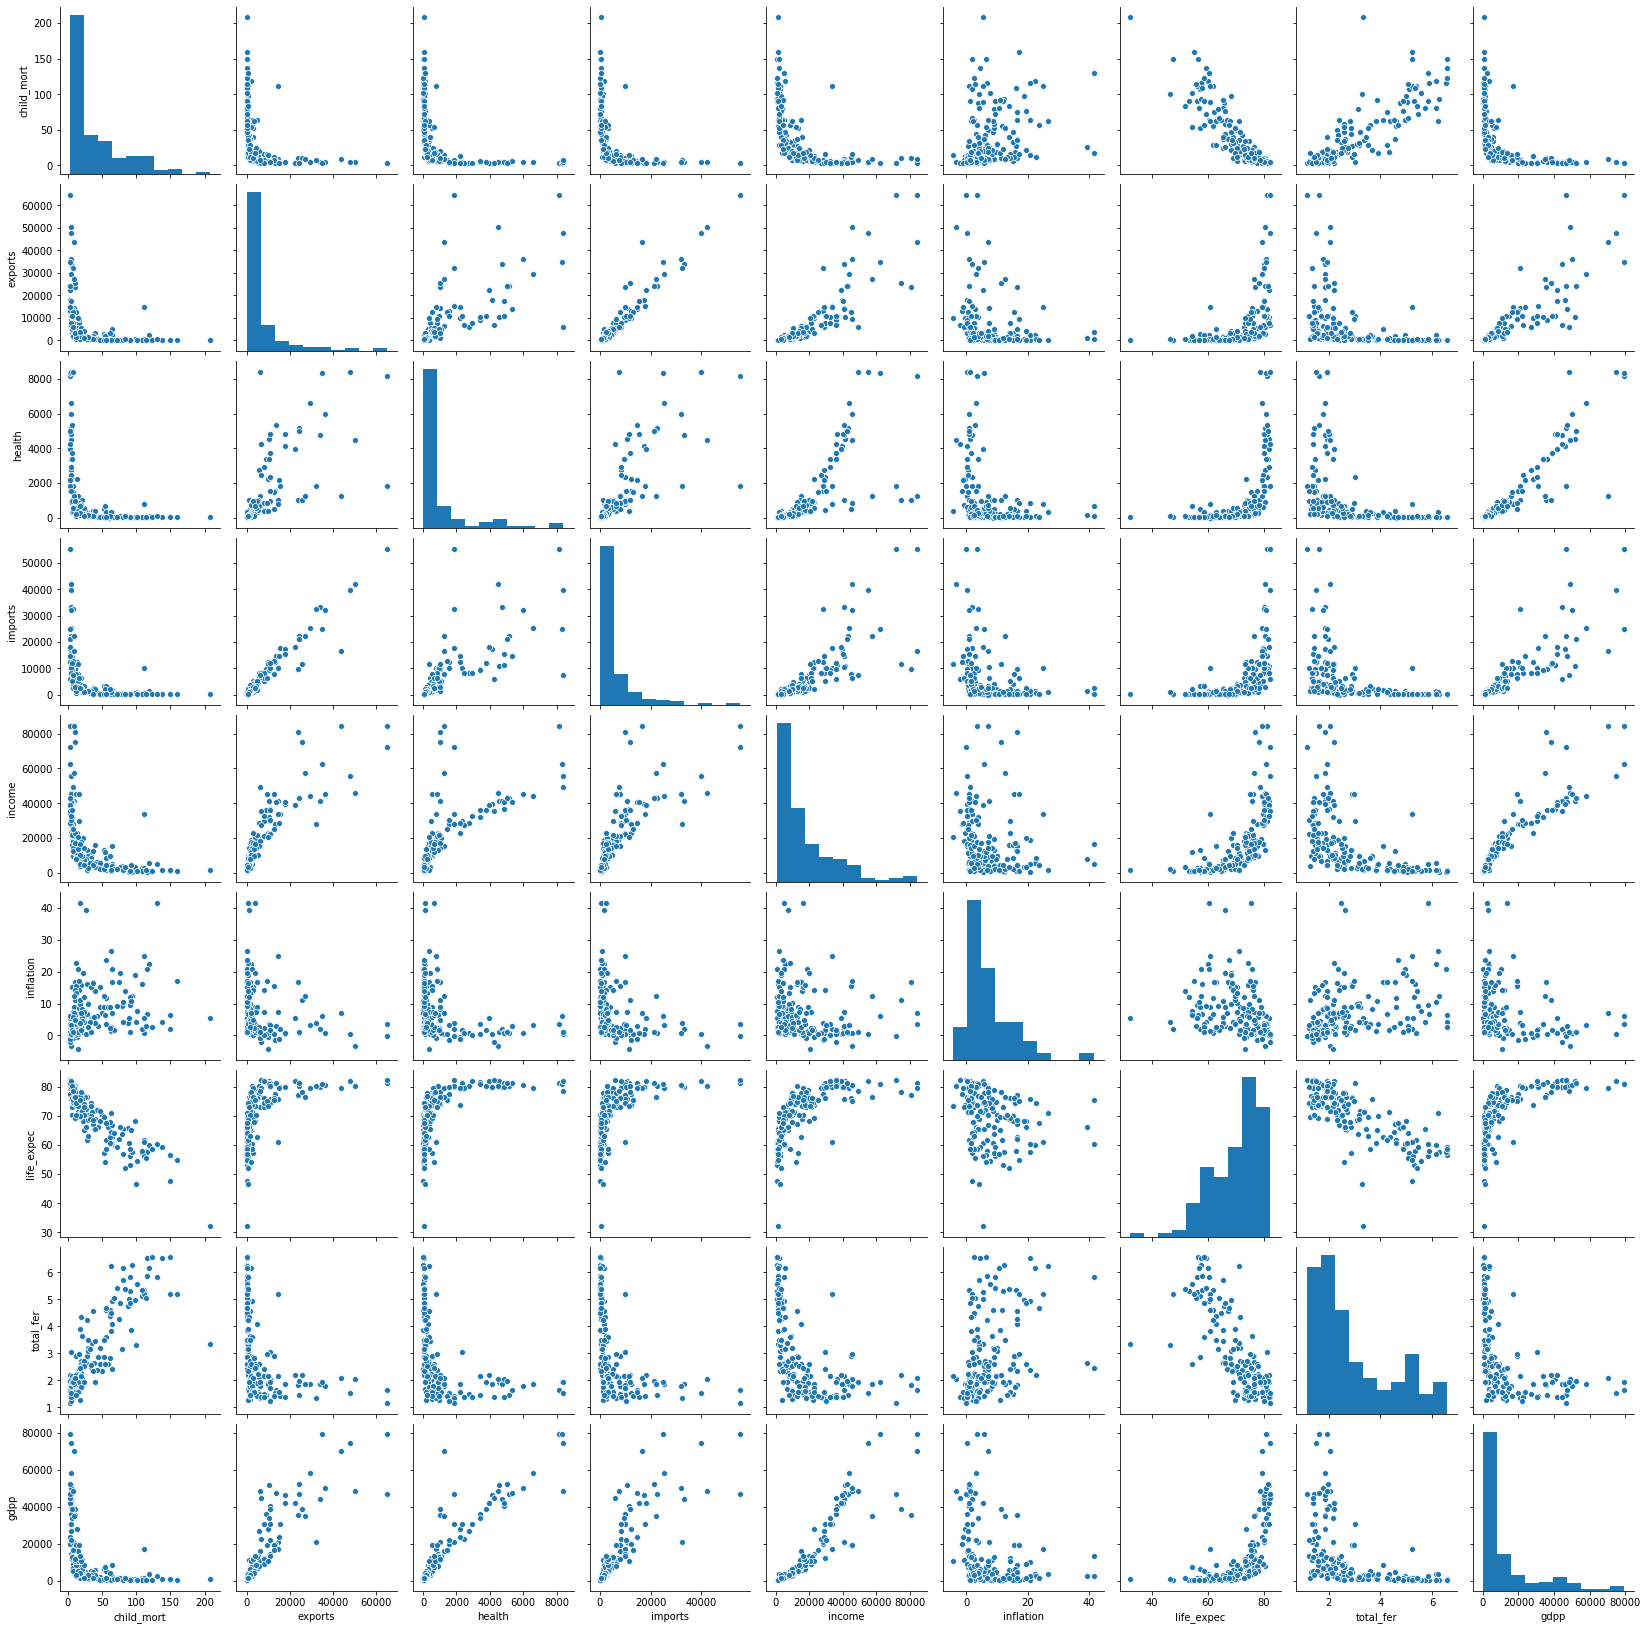

In [21]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(df)
plt.show()

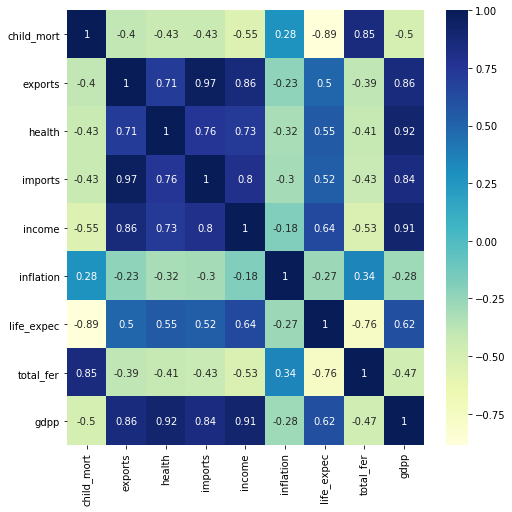

In [22]:
# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (8,8))  
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu")

We see high correlation between `total_fer` and `child_mort`, between `gdpp` and `income`,and between `imports` and `exports`

#### Hopkins Statistics:

In [23]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [24]:
hopkins(df.drop('country', axis = 1))

0.9466461122137142

##### Since the value is > 0.7 the given dataset has a good tendency to form clusters.

## Data Scaling

Using standard scalar for data scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.29153663, -0.56962212, -0.56695778, ..., -1.61970522,
         1.92639646, -0.70225949],
       [-0.53899289, -0.47385792, -0.4403934 , ...,  0.64883094,
        -0.86505432, -0.49872564],
       [-0.27286971, -0.42399973, -0.48627082, ...,  0.67140344,
        -0.03498262, -0.47743428],
       ...,
       [-0.37235501, -0.49160668, -0.54024972, ...,  0.28767096,
        -0.66423052, -0.65869853],
       [ 0.44839871, -0.53995007, -0.55242911, ..., -0.34435902,
         1.15657191, -0.65869853],
       [ 1.11495022, -0.52701632, -0.54227159, ..., -2.09372771,
         1.64524315, -0.6500669 ]])

In [26]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


## Clustering

### K-Mean Clustering

### K-means with some K:

#### Silhouette Analysis:

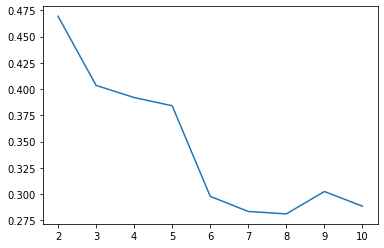

In [27]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

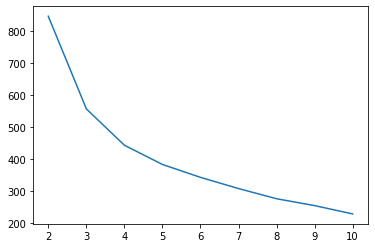

In [28]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

#### Sum of Squared Distances:

By looking silhouette analysis, we see the highest peak is at k =3 and in sum of squared distances graph , we see that the elbow is in the range of 3 to 4 , so let us take k as 3.

In [29]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4693935858809981
For n_clusters=3, the silhouette score is 0.40354406834617873
For n_clusters=4, the silhouette score is 0.39198304727104893
For n_clusters=5, the silhouette score is 0.3841728541997584
For n_clusters=6, the silhouette score is 0.29441297558167334
For n_clusters=7, the silhouette score is 0.3072995714165807
For n_clusters=8, the silhouette score is 0.31616788095995935


#### Kmeans with K= 3

In [30]:
# K=3

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [31]:
df_kmean = df.copy()


In [32]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


In [33]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [34]:
df_kmean.label.value_counts()

0    90
2    48
1    29
Name: label, dtype: int64

#### Scatterplot b/w  components and Label:

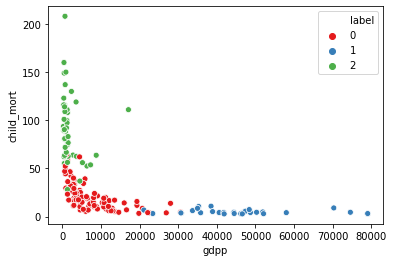

In [35]:
# scatter plot gdpp , child_mort and label

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')

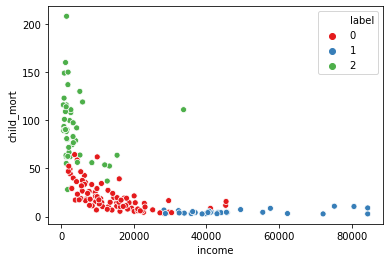

In [36]:
# scatter plot between  income , child_mort and label

sns.scatterplot(x = 'income', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')

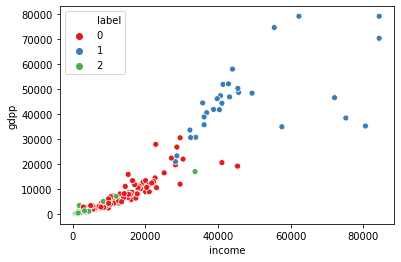

In [37]:
# scatter plot between  income , gdpp and label

sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')

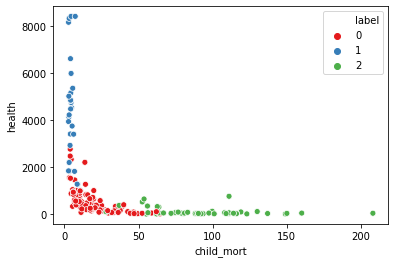

In [38]:
# scatter plot between  child_mort, health and label 

sns.scatterplot(x = 'child_mort', y = 'health', hue = 'label', data = df_kmean, palette = 'Set1')

### Cluster Profiling

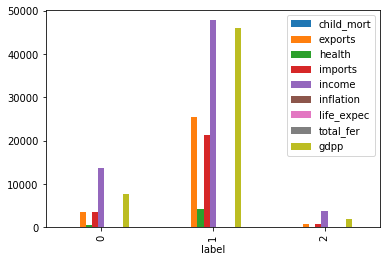

In [39]:
# Making sense out of the clsuters

df_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')

###### Drawing inference for the clusters using gdpp , income and child_mort

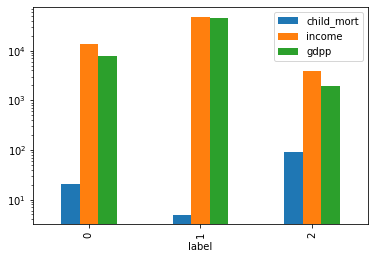

In [40]:
#bar plot for labels using gdpp , income and child_mort

df_kmean.drop(['country', 'exports','health','imports', 'inflation', 'life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.yscale('log')

As we can see cluster 2 is having high child motality , low income and gdpp than other 2 clusters , hence we will pick it to check for the top 5 countries in need of the aid

In [41]:
# Picking up cluster 2 countries

df_kmean[df_kmean['label'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,2


Arranging the countries in decreasing child mortality , increasing income and gdpp

In [42]:
df_kmean[df_kmean['label'] == 2].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,2


As per K- means clustering, the country which are direst need of aid are:

    1. Haiti	
    2. Sierra Leone
    3. Chad
    4. Central African Republic	
    5. Mali	


## Hierarchical Clustering:

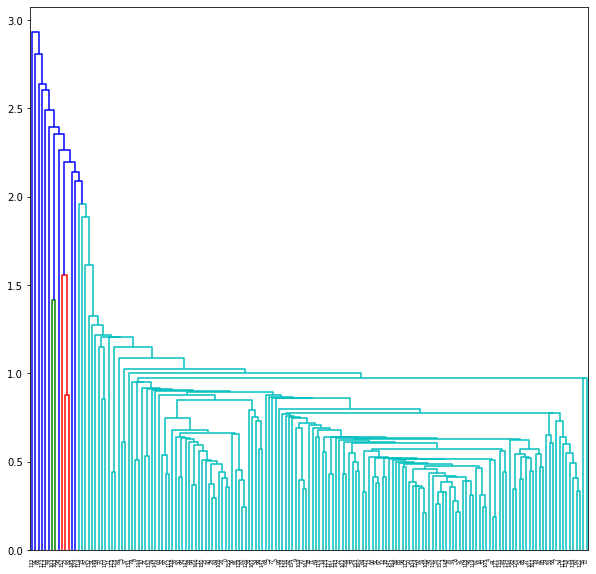

In [56]:
# heirarchical clustering single method

fig = plt.figure(figsize = (10,10))
mergings = linkage(df1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

By single method heirarchical clustering things are not clear, so let us go for complete heirarchical clustering method.

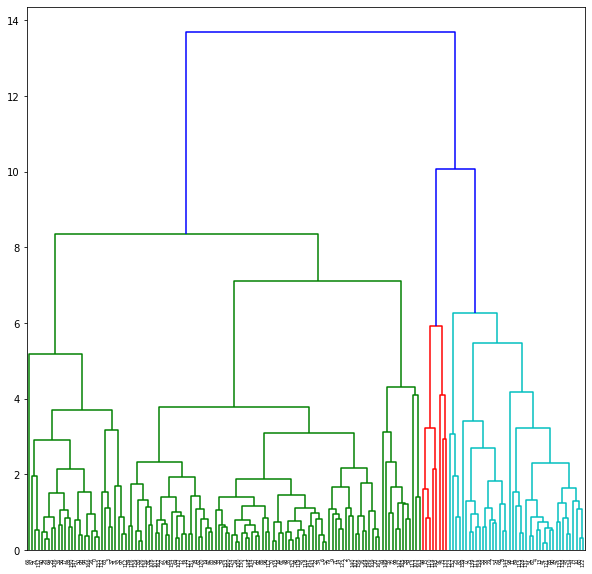

In [57]:
# heirarchical clustering complete method

fig = plt.figure(figsize = (10,10))
mergings = linkage(df1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Let us cut the dendrogram vertically such that n_clusters = 3

In [45]:
# Cutting using 3 clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [46]:
df_heirarcy=df.copy()

In [47]:
# Adding the cluster labels to the dataframe

df_heirarcy['cluster_labels'] = cluster_labels
df_heirarcy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


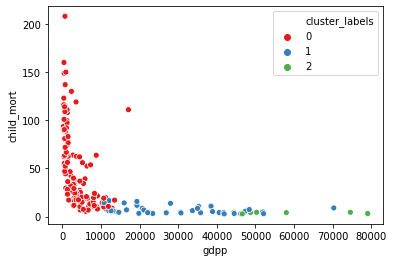

In [48]:
# scatter plot gdpp , child_mort and cluster_labels

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_labels', data = df_heirarcy, palette = 'Set1')

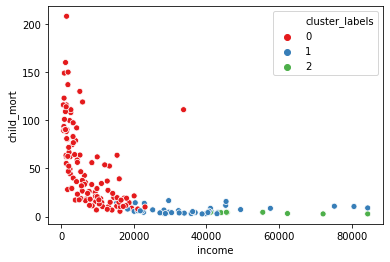

In [49]:
 # scatter plot income , child_mort and cluster_labels

sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_labels', data = df_heirarcy, palette = 'Set1')

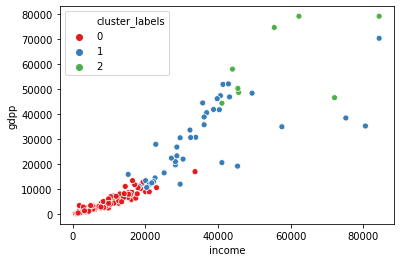

In [50]:
 # scatter plot income , gdpp and cluster_labels

sns.scatterplot(x = 'income', y = 'gdpp', hue = 'cluster_labels', data = df_heirarcy, palette = 'Set1')

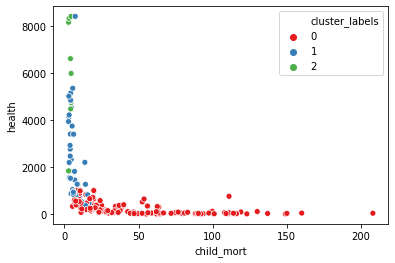

In [60]:
# scatter plot between  child_mort, health and cluster_labels 

sns.scatterplot(x = 'child_mort', y = 'health', hue = 'cluster_labels', data = df_heirarcy, palette = 'Set1')

## Cluster Profiling

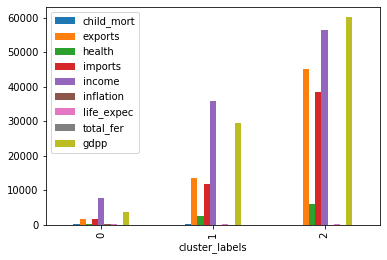

In [51]:
# Making sense out of the clsuters

df_heirarcy.groupby('cluster_labels').mean().plot(kind = 'bar')

###### Drawing inference for the clusters using gdpp , income and child_mort

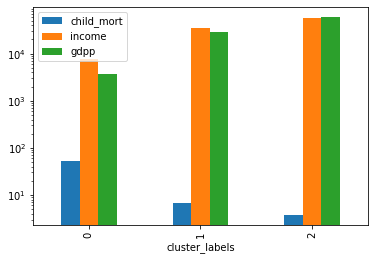

In [52]:
#bar plot for labels using gdpp , income and child_mort

df_heirarcy.drop(['country','exports','health','imports', 'inflation', 'life_expec','total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')
plt.yscale('log')

As we can see cluster 0 is having high child motality , low income and gdpp than other 2 clusters , hence we will pick it to check for the top 5 countries in need of the aid

In [53]:
# Picking up cluster 0 countries

df_heirarcy[df_heirarcy['cluster_labels'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0,0


Arranging the countries in decreasing child mortality , increasing income and gdpp

In [54]:
df_heirarcy[df_heirarcy['cluster_labels'] == 0].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0


As per Hierarical clustering, the country which are direst need of aid are:

    1. Haiti	
    2. Sierra Leone
    3. Chad
    4. Central African Republic	
    5. Mali	

We got same countries by both K-means and Heirarchical Clustering: 
Therefore following are the countries which are in direst need of aid by considering socio – economic factor into consideration:

    1. Haiti	
    2. Sierra Leone
    3. Chad
    4. Central African Republic	
    5. Mali	